# Problem Statement:
    
You are required to help the broker build a classification model which classifies the client's order requirement with the best supplier.

    Algorithms Covered:
    
Used Decision Tree and Random Forest algorithms to solve the same problem. 

Used k-NN and Naive Bayes algorithms to solve the same problem.
 

### Step I: Importing, Cleaning and EDA

In [1]:
# Importing libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

### Training data


In [2]:
df = pd.read_csv('~/Desktop/TechnicalTask/dataset/dataset.csv')

df.head()

,Order Date,Purchase Order,Customer ID,Customer Location,Order Req Amt (Ton),Fullfilled By ID,Fullfilled By Location,Supplied Amt (Ton),Cost Of Delivery ($)
0,02/10/21 01:11,50f43343-e930-4f2e-91be-606bc018c872,c53fa27e-c8c2-4b77-a89a-6ed11fa87317,Cincinatti,203,19f4a11d-63ca-4127-975a-15933aaa33ff,Omaha,203,2233
1,02/10/21 04:17,cb06e4cc-5469-4e30-a92f-287ae4a62896,d20009ca-5479-4232-8b07-7c8c11f74c2e,St Louis,127,cf9651b0-df49-498f-a66c-0a7f897545ce,Kansas City,127,1016
2,02/10/21 04:43,a23e6eb8-8a52-434b-b35c-5c1d3a70b0ea,70080304-afa3-4026-9c86-95970c4ed5b4,Chicago,242,ae5d7b77-86c9-49d2-ac18-09bf9883adc2,Des Moines,210,840
3,02/09/21 03:26,cd5fdc3d-b08f-426e-bc9e-fb25a676d2be,c53fa27e-c8c2-4b77-a89a-6ed11fa87317,Cincinatti,188,cf9651b0-df49-498f-a66c-0a7f897545ce,Kansas City,188,1880
4,02/09/21 05:08,90474d73-46c2-4e7a-a42e-27907d13fe48,70080304-afa3-4026-9c86-95970c4ed5b4,Chicago,154,19f4a11d-63ca-4127-975a-15933aaa33ff,Omaha,154,1078


In [3]:
# Looking at the bigger picture
print("order_dataset: ",df.shape)
df.info()


order_dataset:  (168, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order Date              168 non-null    object
 1   Purchase Order          168 non-null    object
 2   Customer ID             168 non-null    object
 3   Customer Location       168 non-null    object
 4   Order Req Amt (Ton)     168 non-null    int64 
 5   Fullfilled By ID        168 non-null    object
 6   Fullfilled By Location  168 non-null    object
 7   Supplied Amt (Ton)      168 non-null    int64 
 8   Cost Of Delivery ($)    168 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 11.9+ KB


In [4]:
df.isnull().sum()

Order Date                0
Purchase Order            0
Customer ID               0
Customer Location         0
Order Req Amt (Ton)       0
Fullfilled By ID          0
Fullfilled By Location    0
Supplied Amt (Ton)        0
Cost Of Delivery ($)      0
dtype: int64

In [5]:
# Summary of each numerical attribute

df.describe()

,Order Req Amt (Ton),Supplied Amt (Ton),Cost Of Delivery ($)
count,168.000000,168.000000,168.000000
mean,197.148810,159.517857,1378.839286
std,97.376892,66.268098,871.956169
min,52.000000,52.000000,260.000000
25%,124.750000,109.750000,757.500000
50%,179.500000,146.000000,1041.500000
75%,263.250000,201.500000,1727.000000
max,443.000000,351.000000,4212.000000


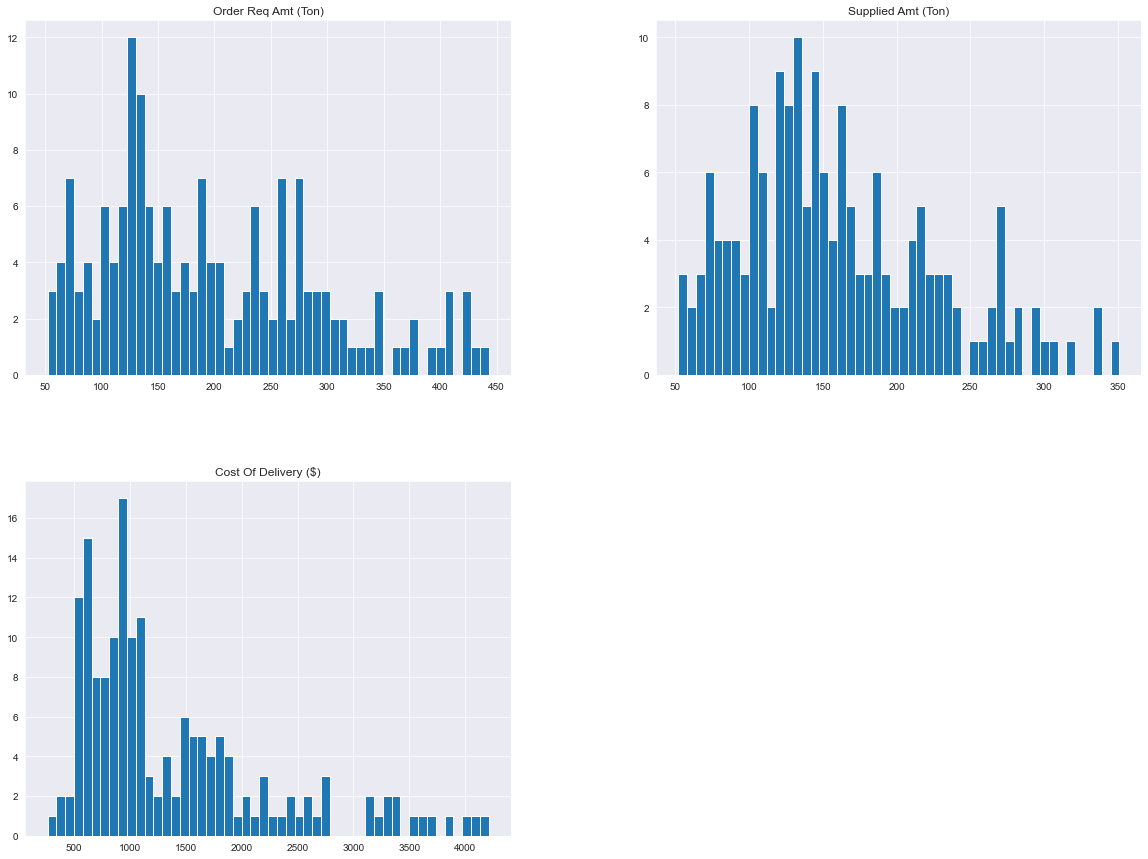

In [6]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
print('The number of request made by customers\n',df["Customer ID"].value_counts())

The number of request made by customers
 c53fa27e-c8c2-4b77-a89a-6ed11fa87317    56
70080304-afa3-4026-9c86-95970c4ed5b4    56
d20009ca-5479-4232-8b07-7c8c11f74c2e    56
Name: Customer ID, dtype: int64


In [8]:
df["Customer ID"].isnull().sum() 


0

In [9]:
print('The count of orders fullfilled by fullfilled location\n',df["Fullfilled By Location"].value_counts())

The count of orders fullfilled by fullfilled location
 Des Moines     58
Omaha          56
Kansas City    54
Name: Fullfilled By Location, dtype: int64


In [10]:
print('The count of orders fullfilled by suppliers \n',df["Fullfilled By ID"].value_counts())

The count of orders fullfilled by suppliers 
 ae5d7b77-86c9-49d2-ac18-09bf9883adc2    58
19f4a11d-63ca-4127-975a-15933aaa33ff    56
cf9651b0-df49-498f-a66c-0a7f897545ce    54
Name: Fullfilled By ID, dtype: int64


In [11]:
print('The count of orders made by customer location \n',df["Customer Location"].value_counts())

The count of orders made by customer location 
 Chicago       56
Cincinatti    56
St Louis      56
Name: Customer Location, dtype: int64


### Discover and Visualize the Data to Gain Insights

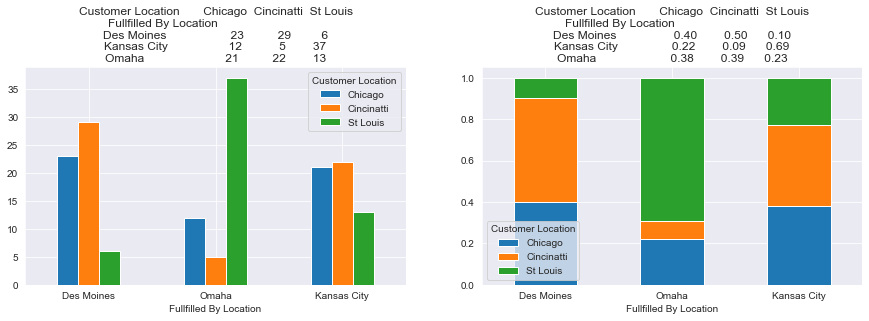

In [12]:
ax1 = df.groupby(["Fullfilled By Location"])["Customer Location"].value_counts().unstack().round(3)

#Counting the number of customer order fullfilled in each location

#Percentage of Customer Order in each segment
ax2 = df.pivot_table(columns='Customer Location',index='Fullfilled By Location',values='Customer ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['Des Moines','Omaha','Kansas City'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['Des Moines','Omaha','Kansas City'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()


In [13]:
df["Order Req Amt (Ton)"].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    168.000000
mean     197.148810
std       97.376892
min       52.000000
25%      124.750000
50%      179.500000
75%      263.250000
90%      336.400000
95%      397.850000
99%      428.970000
max      443.000000
Name: Order Req Amt (Ton), dtype: float64

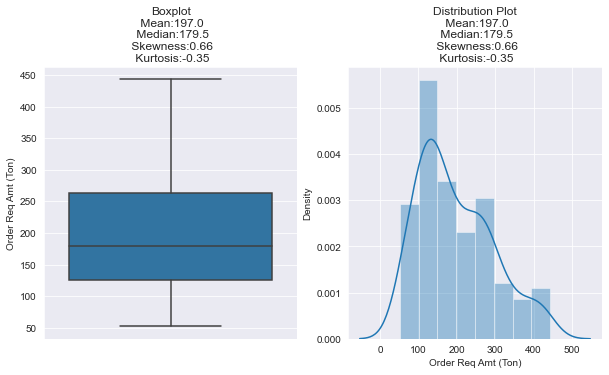

In [14]:
# Looking at the distribution of column Order Req Amt (Ton)
plt.figure(figsize=(10,5))

skewness = round(df["Order Req Amt (Ton)"].skew(),2)
kurtosis = round(df["Order Req Amt (Ton)"].kurtosis(),2)
mean = round(np.mean(df["Order Req Amt (Ton)"]),0)
median = np.median(df["Order Req Amt (Ton)"])

plt.subplot(1,2,1)
sns.boxplot(y=df["Order Req Amt (Ton)"])
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(df["Order Req Amt (Ton)"])
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

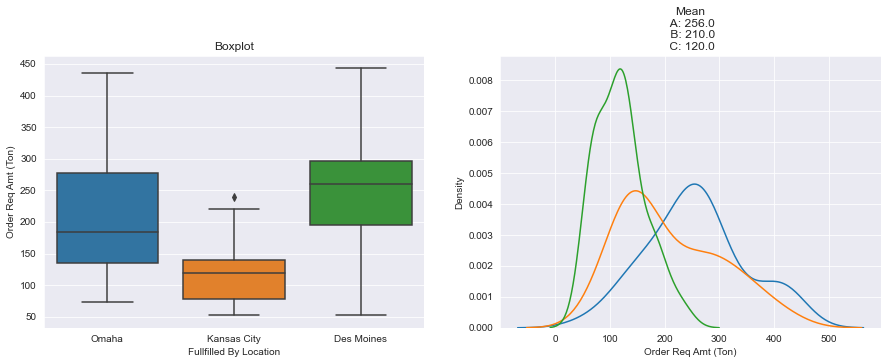

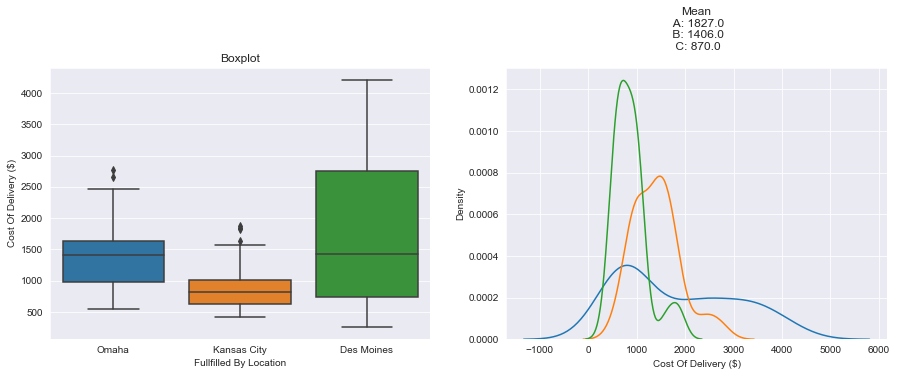

In [15]:
# Looking the distribution of column Fullfilled By Location w.r.t to each segment
a = df[df["Fullfilled By Location"] =='Des Moines']["Order Req Amt (Ton)"]
b = df[df["Fullfilled By Location"] =='Omaha']["Order Req Amt (Ton)"]
c = df[df["Fullfilled By Location"] =='Kansas City']["Order Req Amt (Ton)"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Fullfilled By Location", y="Order Req Amt (Ton)")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'Des Moines')
sns.kdeplot(b,shade= False, label = 'Omaha')
sns.kdeplot(c,shade= False, label = 'Kansas City')
plt.xlabel('Order Req Amt (Ton)')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0)))
plt.show()

a = df[df["Fullfilled By Location"] =='Des Moines']["Cost Of Delivery ($)"]
b = df[df["Fullfilled By Location"] =='Omaha']["Cost Of Delivery ($)"]
c = df[df["Fullfilled By Location"]=='Kansas City']["Cost Of Delivery ($)"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Fullfilled By Location", y="Cost Of Delivery ($)")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'Des Moines')
sns.kdeplot(b,shade= False, label = 'Omaha')
sns.kdeplot(c,shade= False, label = 'Kansas City')
plt.xlabel('Cost Of Delivery ($)')
plt.ylabel('Density')
plt.title("Mean\n Des Moines: {}\n Omaha: {}\n Kansas City: {}\n".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0)))

plt.show()

In [16]:
df1 = df.copy()
df1.head()

,Order Date,Purchase Order,Customer ID,Customer Location,Order Req Amt (Ton),Fullfilled By ID,Fullfilled By Location,Supplied Amt (Ton),Cost Of Delivery ($)
0,02/10/21 01:11,50f43343-e930-4f2e-91be-606bc018c872,c53fa27e-c8c2-4b77-a89a-6ed11fa87317,Cincinatti,203,19f4a11d-63ca-4127-975a-15933aaa33ff,Omaha,203,2233
1,02/10/21 04:17,cb06e4cc-5469-4e30-a92f-287ae4a62896,d20009ca-5479-4232-8b07-7c8c11f74c2e,St Louis,127,cf9651b0-df49-498f-a66c-0a7f897545ce,Kansas City,127,1016
2,02/10/21 04:43,a23e6eb8-8a52-434b-b35c-5c1d3a70b0ea,70080304-afa3-4026-9c86-95970c4ed5b4,Chicago,242,ae5d7b77-86c9-49d2-ac18-09bf9883adc2,Des Moines,210,840
3,02/09/21 03:26,cd5fdc3d-b08f-426e-bc9e-fb25a676d2be,c53fa27e-c8c2-4b77-a89a-6ed11fa87317,Cincinatti,188,cf9651b0-df49-498f-a66c-0a7f897545ce,Kansas City,188,1880
4,02/09/21 05:08,90474d73-46c2-4e7a-a42e-27907d13fe48,70080304-afa3-4026-9c86-95970c4ed5b4,Chicago,154,19f4a11d-63ca-4127-975a-15933aaa33ff,Omaha,154,1078


In [17]:
# Separating dependent-independent variables

X = df1.drop(['Order Date', 'Purchase Order', 'Customer ID','Supplied Amt (Ton)',
              'Fullfilled By ID','Fullfilled By Location', 'Cost Of Delivery ($)'], axis=1)
y =df1['Fullfilled By ID']

In [18]:
X.head()

,Customer Location,Order Req Amt (Ton)
0,Cincinatti,203
1,St Louis,127
2,Chicago,242
3,Cincinatti,188
4,Chicago,154


In [19]:
X.describe()

,Order Req Amt (Ton)
count,168.000000
mean,197.148810
std,97.376892
min,52.000000
25%,124.750000
50%,179.500000
75%,263.250000
max,443.000000


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer Location    168 non-null    object
 1   Order Req Amt (Ton)  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


##### Preprocessing on train data and test data

In [21]:
# import the train-test split

from sklearn.model_selection import train_test_split

# divide into train and test sets
df1_trainX, df1_testX, df1_trainY, df1_testY = train_test_split(X,y, train_size = 0.8)

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_trainX['Customer Location'], prefix='Customer Location')
df1_trainX = pd.concat([df1_trainX, pf],axis=1)


# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_testX['Customer Location'], prefix='Customer Location')
df1_testX = pd.concat([df1_testX, pf],axis=1)

df1_trainX.drop(['Customer Location'], axis=1, inplace=True)

df1_testX.drop(['Customer Location'], axis=1, inplace=True)


In [22]:
df1_trainX.shape, df1_trainY.shape, df1_testX.shape, df1_testY.shape

((134, 4), (134,), (34, 4), (34,))

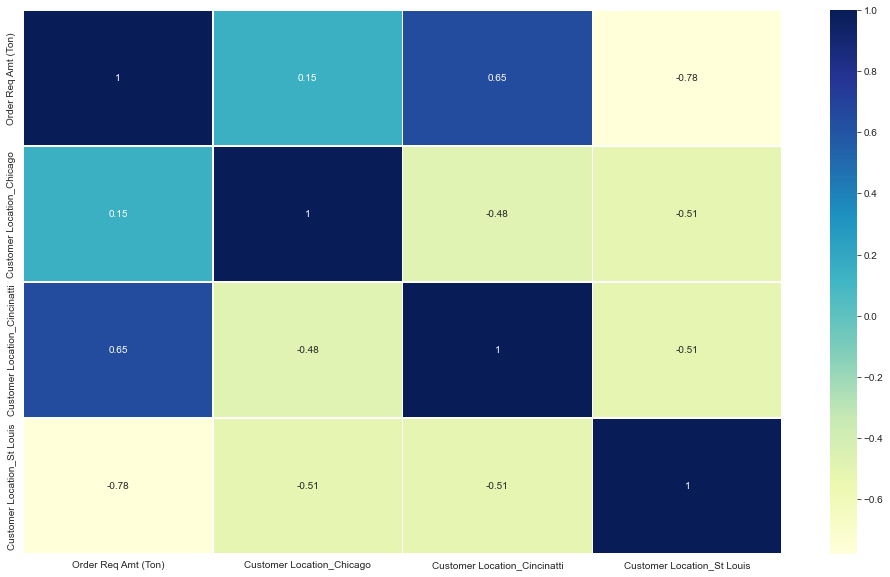

In [23]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(df1_trainX.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

In [24]:
train_dt1_x = df1_trainX.copy()
train_dt1_x.head()

,Order Req Amt (Ton),Customer Location_Chicago,Customer Location_Cincinatti,Customer Location_St Louis
4,154,1,0,0
54,130,0,0,1
16,347,0,1,0
73,170,1,0,0
81,392,0,1,0


In [25]:
train_dt1_y = df1_trainY.copy()
train_dt1_y.head()

4     19f4a11d-63ca-4127-975a-15933aaa33ff
54    cf9651b0-df49-498f-a66c-0a7f897545ce
16    19f4a11d-63ca-4127-975a-15933aaa33ff
73    cf9651b0-df49-498f-a66c-0a7f897545ce
81    19f4a11d-63ca-4127-975a-15933aaa33ff
Name: Fullfilled By ID, dtype: object

#### Step II: Model Building
    
I. Decision Tree


Decision tree is a type of supervised learning algorithm (having a predefined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. 

In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. 

The topmost node in a decision tree is known as the root node. 

It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning.

This flowchart-like structure helps you in decision making. 

It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.
Decision Tree is a white box type of ML algorithm. 

It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network.
Its training time is faster compared to the neural network algorithm. 

The time complexity of decision trees is a function of the number of records and number of attributes in the given data.
The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. 

Decision trees can handle high dimensional data with good accuracy.

How does the Decision Tree algorithm work?

The basic idea behind any decision tree algorithm is as follows:

Select the best attribute using Attribute Selection Measures(ASM) to split the records.
Make that attribute a decision node and breaks the dataset into smaller subsets.

Starts tree building by repeating this process recursively for each child until one of the condition will match:
All the tuples belong to the same attribute value.
There are no more remaining attributes.
There are no more instances.


##### Building the model 

In [26]:
# importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# creating the decision tree function
model_dt1 = DecisionTreeClassifier(criterion='gini')

#fitting the model
model_dt1.fit(train_dt1_x, train_dt1_y)

# depth of the decision tree
print('Depth of the Decision Tree: ', model_dt1.get_depth())

#checking the training score
print('Accuracy on training: ',model_dt1.score(train_dt1_x, train_dt1_y))

# predict the target on the train dataset
yhat1 = model_dt1.predict(train_dt1_x)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(train_dt1_y.values, yhat1, labels=["cf9651b0-df49-498f-a66c-0a7f897545ce","ae5d7b77-86c9-49d2-ac18-09bf9883adc2","19f4a11d-63ca-4127-975a-15933aaa33ff"])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_dt1_y.values, yhat1))


Depth of the Decision Tree:  13
Accuracy on training:  0.9477611940298507
-------The confusion matrix for this model is-------
[[39  1  3]
 [ 1 48  1]
 [ 1  0 40]]


-------Printing the whole report of the model-------
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.91      0.98      0.94        41
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.98      0.96      0.97        50
cf9651b0-df49-498f-a66c-0a7f897545ce       0.95      0.91      0.93        43

                            accuracy                           0.95       134
                           macro avg       0.95      0.95      0.95       134
                        weighted avg       0.95      0.95      0.95       134



In [27]:
X1 = train_dt1_x.copy()
y1 = pd.DataFrame({'Seg':train_dt1_y})
y1['Seg'] = y1['Seg'].replace(('19f4a11d-63ca-4127-975a-15933aaa33ff','ae5d7b77-86c9-49d2-ac18-09bf9883adc2','cf9651b0-df49-498f-a66c-0a7f897545ce'),(1,2,3))

In [28]:
# Implementing grid search

parameter_grid = {
    'max_depth' : [9,10,11,12,13,14,15],
    'max_features': [0.3, 0.5, 0.7]
    }

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=model_dt1, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

gridsearch.fit(X1, y1)

print(gridsearch.best_params_)

{'max_depth': 12, 'max_features': 0.7}


In [29]:
# Implementing random search

parameter_grid = {
    'max_depth' : [9,10,11,12,13,14,15],
    'max_features': [0.3, 0.5, 0.7, 0.9]
    }

from sklearn.model_selection import RandomizedSearchCV

randomsearch = RandomizedSearchCV(estimator=model_dt1, param_distributions=parameter_grid, n_iter= 10, cv=5)
randomsearch.fit(X1, y1)

print(randomsearch.best_params_)

{'max_features': 0.3, 'max_depth': 11}


In [30]:
# final model
model_dt1 = DecisionTreeClassifier(max_depth=13, max_features=0.7)

# fitting the model
model_dt1.fit(train_dt1_x, train_dt1_y)

# Training score
print(model_dt1.score(train_dt1_x, train_dt1_y).round(4))

0.9403


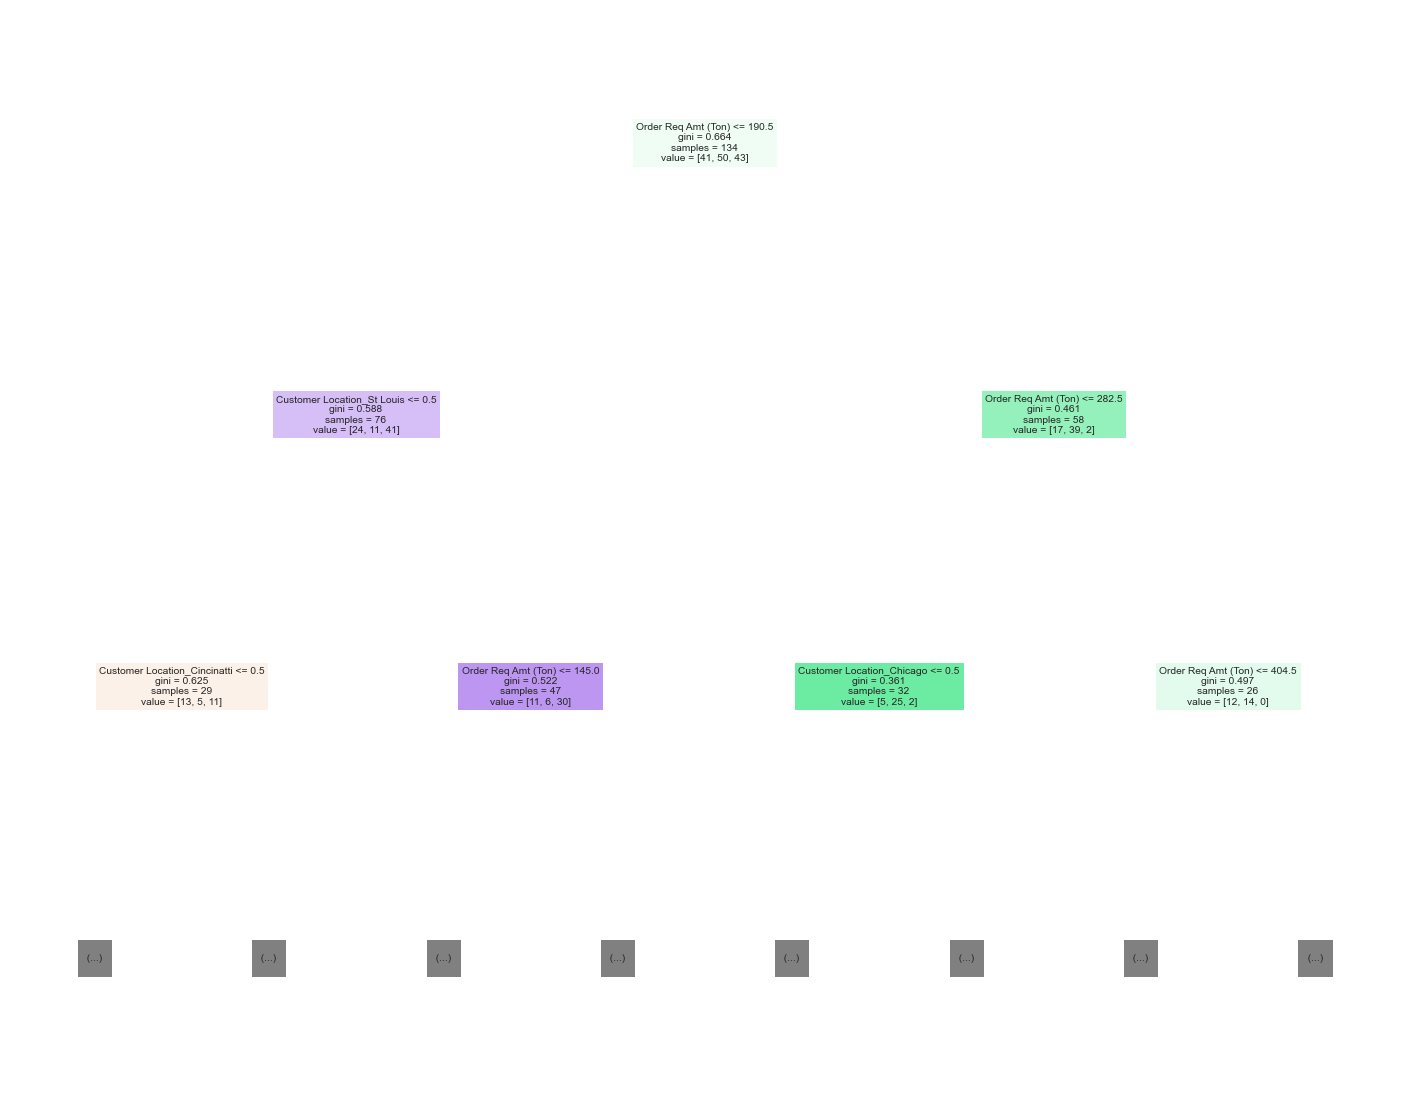

In [31]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt1, feature_names=train_dt1_x.columns, max_depth=2, filled=True)

In [32]:
test_dt1_x = df1_testX.copy()
test_dt1_x

,Order Req Amt (Ton),Customer Location_Chicago,Customer Location_Cincinatti,Customer Location_St Louis
133,275,1,0,0
14,275,1,0,0
112,260,0,1,0
115,96,0,0,1
78,183,0,1,0
27,201,1,0,0
100,118,0,0,1
66,404,0,1,0
52,62,0,0,1
113,108,0,0,1


In [33]:
test_dt1_y = df1_testY.copy()
test_dt1_y.head()

133    19f4a11d-63ca-4127-975a-15933aaa33ff
14     19f4a11d-63ca-4127-975a-15933aaa33ff
112    ae5d7b77-86c9-49d2-ac18-09bf9883adc2
115    cf9651b0-df49-498f-a66c-0a7f897545ce
78     19f4a11d-63ca-4127-975a-15933aaa33ff
Name: Fullfilled By ID, dtype: object

In [34]:
y_dt1 = model_dt1.predict(test_dt1_x)
y_dt1

array(['ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       '19f4a

In [35]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_dt1_y.values, y_dt1, labels=["cf9651b0-df49-498f-a66c-0a7f897545ce","ae5d7b77-86c9-49d2-ac18-09bf9883adc2","19f4a11d-63ca-4127-975a-15933aaa33ff"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_dt1_y.values, y_dt1))

-------The confusion matrix for test data is-------

[[6 2 3]
 [1 4 3]
 [4 5 6]]


-------Printing the report of test data-------

                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.50      0.40      0.44        15
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.36      0.50      0.42         8
cf9651b0-df49-498f-a66c-0a7f897545ce       0.55      0.55      0.55        11

                            accuracy                           0.47        34
                           macro avg       0.47      0.48      0.47        34
                        weighted avg       0.48      0.47      0.47        34



In [36]:
#serializing our model to a file called model.pkl
import pickle
    
pickle.dump(model_dt1, open("dtmodel.pkl","wb"))

In [38]:
test = model_dt1.predict(test_dt1_x.iloc[1:2]) 
test

array(['ae5d7b77-86c9-49d2-ac18-09bf9883adc2'], dtype=object)

In [39]:
print('************************  MODEL - Decision Tree REPORT  *********************************\n')
print('Train data')
print(classification_report(train_dt1_y.values, yhat1))
print('\nTest data')
print(classification_report(test_dt1_y.values, y_dt1))

************************  MODEL - Decision Tree REPORT  *********************************

Train data
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.91      0.98      0.94        41
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.98      0.96      0.97        50
cf9651b0-df49-498f-a66c-0a7f897545ce       0.95      0.91      0.93        43

                            accuracy                           0.95       134
                           macro avg       0.95      0.95      0.95       134
                        weighted avg       0.95      0.95      0.95       134


Test data
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.50      0.40      0.44        15
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.36      0.50      0.42         8
cf9651b0-df49-498f-a66c-0a7f897545ce       0.55      0.55      0.55        11

                        

In [41]:
import joblib

joblib.dump(model_dt1, "dtreemodel.pkl")

my_model_loaded  = joblib.load("dtreemodel.pkl")

In [42]:
pd.Series(y_dt1).value_counts()

19f4a11d-63ca-4127-975a-15933aaa33ff    12
cf9651b0-df49-498f-a66c-0a7f897545ce    11
ae5d7b77-86c9-49d2-ac18-09bf9883adc2    11
dtype: int64

#### IV. Random Forest¶

Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. 
It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. 
It is also a pretty good indicator of feature importance.
Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.


How does the algorithm work?

It works in four steps:

Select random samples from a given dataset.
Construct a decision tree for each sample and get a prediction result from each decision tree.
Perform a vote for each predicted result.
Select the prediction result with the most votes as the final prediction.

Difference between Decision Tree and Random Forest

I will compare random forests with decision-trees. 
Some salient features of comparison are as follows:-
Random forests is a set of multiple decision-trees.
Decision-trees are computationally faster as compared to random forests.
Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.
Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules.

##### Predicting on test set

In [43]:
train_rf1_x = df1_trainX.copy()
train_rf1_x.head()

,Order Req Amt (Ton),Customer Location_Chicago,Customer Location_Cincinatti,Customer Location_St Louis
4,154,1,0,0
54,130,0,0,1
16,347,0,1,0
73,170,1,0,0
81,392,0,1,0


In [44]:
train_rf1_y = df1_trainY.copy()
train_rf1_y.head()

4     19f4a11d-63ca-4127-975a-15933aaa33ff
54    cf9651b0-df49-498f-a66c-0a7f897545ce
16    19f4a11d-63ca-4127-975a-15933aaa33ff
73    cf9651b0-df49-498f-a66c-0a7f897545ce
81    19f4a11d-63ca-4127-975a-15933aaa33ff
Name: Fullfilled By ID, dtype: object

In [45]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with 20 decision tree
rfc1 = RandomForestClassifier(random_state=0,n_estimators=20)

# Train model
model_rfc1 = rfc1.fit(train_rf1_x, train_rf1_y)

# Predicting the classes
yhat3 = rfc1.predict(train_rf1_x)

# view the feature scores
feature_scores = pd.Series(rfc1.feature_importances_, index=train_rf1_x.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(train_rf1_y.values, yhat3, labels=["cf9651b0-df49-498f-a66c-0a7f897545ce","ae5d7b77-86c9-49d2-ac18-09bf9883adc2","19f4a11d-63ca-4127-975a-15933aaa33ff"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm3)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_rf1_y.values, yhat3))

The importance of features ranked from high to low:
 Order Req Amt (Ton)             0.920439
Customer Location_St Louis      0.043713
Customer Location_Cincinatti    0.020933
Customer Location_Chicago       0.014915
dtype: float64


-------The confusion matrix for this model is-------
[[40  1  2]
 [ 2 47  1]
 [ 2  2 37]]


-------Printing the whole report of the model-------
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.93      0.90      0.91        41
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.94      0.94      0.94        50
cf9651b0-df49-498f-a66c-0a7f897545ce       0.91      0.93      0.92        43

                            accuracy                           0.93       134
                           macro avg       0.92      0.92      0.92       134
                        weighted avg       0.93      0.93      0.93       134



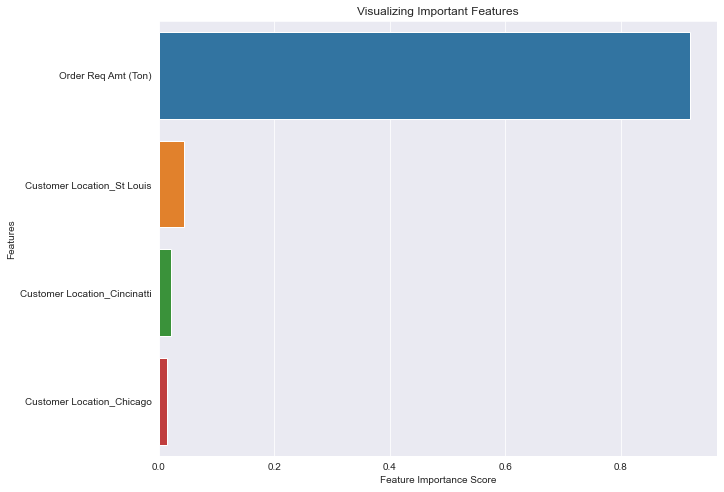

In [46]:
# Creating bar plot of scores of variables importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [47]:
test_rf1_x = df1_testX.copy()
test_rf1_x.iloc[9:10] 

,Order Req Amt (Ton),Customer Location_Chicago,Customer Location_Cincinatti,Customer Location_St Louis
113,108,0,0,1


In [48]:
y_rf1 = rfc1.predict(test_rf1_x)
y_rf1

array(['ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'cf965

In [49]:
test_rf1_y = df1_testY.copy()


In [50]:
from sklearn.metrics import confusion_matrix

print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_rf1_y.values, y_rf1, labels=["cf9651b0-df49-498f-a66c-0a7f897545ce","ae5d7b77-86c9-49d2-ac18-09bf9883adc2","19f4a11d-63ca-4127-975a-15933aaa33ff"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_rf1_y.values, y_rf1))

-------The confusion matrix for test data is-------

[[6 2 3]
 [1 5 2]
 [5 6 4]]


-------Printing the report of test data-------

                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.44      0.27      0.33        15
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.38      0.62      0.48         8
cf9651b0-df49-498f-a66c-0a7f897545ce       0.50      0.55      0.52        11

                            accuracy                           0.44        34
                           macro avg       0.44      0.48      0.44        34
                        weighted avg       0.45      0.44      0.43        34



#### Step III: Model Evaluation

In [51]:
print('************************  MODEL - Random Forest REPORT  *********************************\n')
print('Train data')
print(classification_report(train_rf1_y.values, yhat3))
print('\nTest data')
print(classification_report(test_rf1_y.values, y_rf1))

************************  MODEL - Random Forest REPORT  *********************************

Train data
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.93      0.90      0.91        41
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.94      0.94      0.94        50
cf9651b0-df49-498f-a66c-0a7f897545ce       0.91      0.93      0.92        43

                            accuracy                           0.93       134
                           macro avg       0.92      0.92      0.92       134
                        weighted avg       0.93      0.93      0.93       134


Test data
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.44      0.27      0.33        15
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.38      0.62      0.48         8
cf9651b0-df49-498f-a66c-0a7f897545ce       0.50      0.55      0.52        11

                        

#### V. k-Nearest Neighbour (k-NN)



KNN is a non-parametric and lazy learning algorithm.

Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. 
This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions.

Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. 
This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

#### The KNN Algorithm

Load the data

Initialize K to your chosen number of neighbors

For each example in the data

Calculate the distance between the query example and the current example from the data.

Add the distance and the index of the example to an ordered collection

Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
Pick the first K entries from the sorted collection

Get the labels of the selected K entries

If regression, return the mean of the K labels

If classification, return the mode of the K labels

In [52]:
train_knn1_x = df1_trainX.copy()
train_rf1_x.head()

,Order Req Amt (Ton),Customer Location_Chicago,Customer Location_Cincinatti,Customer Location_St Louis
4,154,1,0,0
54,130,0,0,1
16,347,0,1,0
73,170,1,0,0
81,392,0,1,0


In [53]:
train_knn1_y = df1_trainY.copy()
train_knn1_y.head()

4     19f4a11d-63ca-4127-975a-15933aaa33ff
54    cf9651b0-df49-498f-a66c-0a7f897545ce
16    19f4a11d-63ca-4127-975a-15933aaa33ff
73    cf9651b0-df49-498f-a66c-0a7f897545ce
81    19f4a11d-63ca-4127-975a-15933aaa33ff
Name: Fullfilled By ID, dtype: object

In [54]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
model_knn1 = KNeighborsClassifier(n_neighbors=3)

#fitting the model
model_knn1.fit(train_knn1_x, train_knn1_y)

#checking the training score
print('Accuracy on training: ',model_knn1.score(train_knn1_x, train_knn1_y))

# predict the target on the train dataset
yhat1 = model_knn1.predict(train_knn1_x)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(train_knn1_y.values, yhat1, labels=["cf9651b0-df49-498f-a66c-0a7f897545ce","ae5d7b77-86c9-49d2-ac18-09bf9883adc2","19f4a11d-63ca-4127-975a-15933aaa33ff"])

print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_knn1_y.values, yhat1))

Accuracy on training:  0.7313432835820896
-------The confusion matrix for this model is-------
[[33  2  8]
 [ 2 37 11]
 [ 5  8 28]]


-------Printing the whole report of the model-------
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.60      0.68      0.64        41
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.79      0.74      0.76        50
cf9651b0-df49-498f-a66c-0a7f897545ce       0.82      0.77      0.80        43

                            accuracy                           0.73       134
                           macro avg       0.74      0.73      0.73       134
                        weighted avg       0.74      0.73      0.73       134



In [55]:
# Function for checking the optimal number of k
train_accuracy = []
for k in range(1,11):
    model_knn1 = KNeighborsClassifier(n_neighbors=k)
    model_knn1.fit(train_knn1_x, train_knn1_y)
    train_accuracy.append(model_knn1.score(train_knn1_x, train_knn1_y))

In [56]:
frame = pd.DataFrame({'no.of k':range(1,11), 'train_acc':train_accuracy})
frame

,no.of k,train_acc
0,1,0.947761
1,2,0.768657
2,3,0.731343
3,4,0.694030
4,5,0.664179
5,6,0.649254
6,7,0.611940
7,8,0.611940
8,9,0.634328
9,10,0.604478


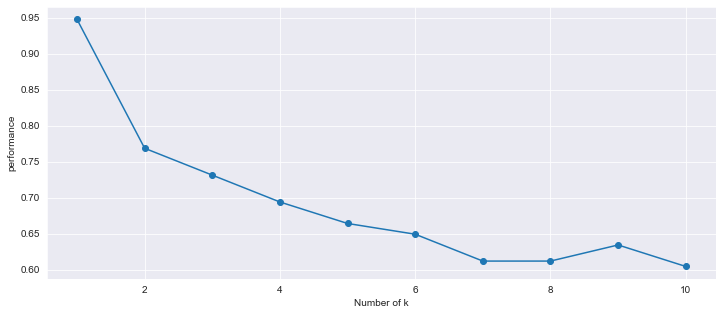

In [57]:
# Elbow curve
plt.figure(figsize=(12,5))
plt.plot(frame['no.of k'], frame['train_acc'], marker='o')
plt.xlabel('Number of k')
plt.ylabel('performance')
plt.show()

In [58]:
# final model
model_knn1 = KNeighborsClassifier(n_neighbors=2)

# fitting the model
model_knn1.fit(train_knn1_x, train_knn1_y)

# Training score
print(model_knn1.score(train_knn1_x, train_knn1_y).round(4))


0.7687


In [59]:
test_knn1_x = df1_testX.copy()
test_knn1_x.head()

,Order Req Amt (Ton),Customer Location_Chicago,Customer Location_Cincinatti,Customer Location_St Louis
133,275,1,0,0
14,275,1,0,0
112,260,0,1,0
115,96,0,0,1
78,183,0,1,0


In [60]:
test_knn1_y = df1_testY.copy()
test_knn1_y.head()

133    19f4a11d-63ca-4127-975a-15933aaa33ff
14     19f4a11d-63ca-4127-975a-15933aaa33ff
112    ae5d7b77-86c9-49d2-ac18-09bf9883adc2
115    cf9651b0-df49-498f-a66c-0a7f897545ce
78     19f4a11d-63ca-4127-975a-15933aaa33ff
Name: Fullfilled By ID, dtype: object

In [61]:
y_knn1 = model_knn1.predict(test_knn1_x)
y_knn1

array(['ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       '19f4a11d-63ca-4127-975a-15933aaa33ff',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       '19f4a

In [62]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_knn1_y.values, y_knn1, labels=["cf9651b0-df49-498f-a66c-0a7f897545ce","ae5d7b77-86c9-49d2-ac18-09bf9883adc2","19f4a11d-63ca-4127-975a-15933aaa33ff"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_knn1_y.values, y_knn1))


-------The confusion matrix for test data is-------

[[5 2 4]
 [0 2 6]
 [2 5 8]]


-------Printing the report of test data-------

                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.44      0.53      0.48        15
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.22      0.25      0.24         8
cf9651b0-df49-498f-a66c-0a7f897545ce       0.71      0.45      0.56        11

                            accuracy                           0.44        34
                           macro avg       0.46      0.41      0.43        34
                        weighted avg       0.48      0.44      0.45        34



In [63]:
pd.Series(y_knn1).value_counts()

19f4a11d-63ca-4127-975a-15933aaa33ff    18
ae5d7b77-86c9-49d2-ac18-09bf9883adc2     9
cf9651b0-df49-498f-a66c-0a7f897545ce     7
dtype: int64

In [64]:
test_knn1_y=df1_testY.copy()

In [65]:
print('************************  MODEL- K-NN REPORT  *********************************\n')
print('Train data')
print(classification_report(train_knn1_y.values, yhat1))
print('\nTest data')
print(classification_report(test_knn1_y.values, y_knn1))


************************  MODEL- K-NN REPORT  *********************************

Train data
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.60      0.68      0.64        41
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.79      0.74      0.76        50
cf9651b0-df49-498f-a66c-0a7f897545ce       0.82      0.77      0.80        43

                            accuracy                           0.73       134
                           macro avg       0.74      0.73      0.73       134
                        weighted avg       0.74      0.73      0.73       134


Test data
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.44      0.53      0.48        15
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.22      0.25      0.24         8
cf9651b0-df49-498f-a66c-0a7f897545ce       0.71      0.45      0.56        11

                            accura

VI. Naive Bayes Classifier

Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. 

Naive Bayes classifiers have high accuracy and speed on large datasets.
Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. 

For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. 
This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.
Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.
Naïve Bayes models are also known as simple Bayes or independent Bayes. 

All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.



In [66]:
train_nb1_x = df1_trainX.copy()
train_nb1_x.head()

,Order Req Amt (Ton),Customer Location_Chicago,Customer Location_Cincinatti,Customer Location_St Louis
4,154,1,0,0
54,130,0,0,1
16,347,0,1,0
73,170,1,0,0
81,392,0,1,0


In [67]:
train_nb1_y = df1_trainY.copy()
train_nb1_y.head()

4     19f4a11d-63ca-4127-975a-15933aaa33ff
54    cf9651b0-df49-498f-a66c-0a7f897545ce
16    19f4a11d-63ca-4127-975a-15933aaa33ff
73    cf9651b0-df49-498f-a66c-0a7f897545ce
81    19f4a11d-63ca-4127-975a-15933aaa33ff
Name: Fullfilled By ID, dtype: object

In [68]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb1 = GaussianNB()

# Train model
model_nb1 = gnb1.fit(train_nb1_x, train_nb1_y)

# Predicting the classes
yhat3 = gnb1.predict(train_nb1_x)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(train_nb1_y.values, yhat3, labels=["cf9651b0-df49-498f-a66c-0a7f897545ce","ae5d7b77-86c9-49d2-ac18-09bf9883adc2","19f4a11d-63ca-4127-975a-15933aaa33ff"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm3)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_nb1_y.values, yhat3))



-------The confusion matrix for this model is-------
[[35  8  0]
 [ 8 42  0]
 [18 23  0]]


-------Printing the whole report of the model-------
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.00      0.00      0.00        41
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.58      0.84      0.68        50
cf9651b0-df49-498f-a66c-0a7f897545ce       0.57      0.81      0.67        43

                            accuracy                           0.57       134
                           macro avg       0.38      0.55      0.45       134
                        weighted avg       0.40      0.57      0.47       134



In [69]:
test_nb1_x = df1_testX.copy()
test_nb1_x.head()

,Order Req Amt (Ton),Customer Location_Chicago,Customer Location_Cincinatti,Customer Location_St Louis
133,275,1,0,0
14,275,1,0,0
112,260,0,1,0
115,96,0,0,1
78,183,0,1,0


In [70]:
test_nb1_y = df1_testY.copy()
test_nb1_y.head()

133    19f4a11d-63ca-4127-975a-15933aaa33ff
14     19f4a11d-63ca-4127-975a-15933aaa33ff
112    ae5d7b77-86c9-49d2-ac18-09bf9883adc2
115    cf9651b0-df49-498f-a66c-0a7f897545ce
78     19f4a11d-63ca-4127-975a-15933aaa33ff
Name: Fullfilled By ID, dtype: object

In [71]:
y_nb1 = gnb1.predict(test_nb1_x)
y_nb1

array(['ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf9651b0-df49-498f-a66c-0a7f897545ce',
       'ae5d7b77-86c9-49d2-ac18-09bf9883adc2',
       'cf965

In [72]:
test_nb1_y=df1_testY.copy()

In [75]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_nb1_y.values, y_nb1, labels=["cf9651b0-df49-498f-a66c-0a7f897545ce","ae5d7b77-86c9-49d2-ac18-09bf9883adc2","19f4a11d-63ca-4127-975a-15933aaa33ff"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_nb1_y.values, y_nb1))

-------The confusion matrix for test data is-------

[[ 8  3  0]
 [ 0  8  0]
 [ 3 12  0]]


-------Printing the report of test data-------

                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.00      0.00      0.00        15
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.35      1.00      0.52         8
cf9651b0-df49-498f-a66c-0a7f897545ce       0.73      0.73      0.73        11

                            accuracy                           0.47        34
                           macro avg       0.36      0.58      0.41        34
                        weighted avg       0.32      0.47      0.36        34



In [76]:
pd.Series(y_nb1).value_counts()

ae5d7b77-86c9-49d2-ac18-09bf9883adc2    23
cf9651b0-df49-498f-a66c-0a7f897545ce    11
dtype: int64

In [77]:
print('************************  MODEL- Naive Bayes Classifier   *********************************\n')
print('Train data')
print(classification_report(train_nb1_y.values, yhat3))
print('\nTest data')
print(classification_report(test_nb1_y.values, y_nb1))

************************  MODEL- Naive Bayes Classifier   *********************************

Train data
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.00      0.00      0.00        41
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.58      0.84      0.68        50
cf9651b0-df49-498f-a66c-0a7f897545ce       0.57      0.81      0.67        43

                            accuracy                           0.57       134
                           macro avg       0.38      0.55      0.45       134
                        weighted avg       0.40      0.57      0.47       134


Test data
                                      precision    recall  f1-score   support

19f4a11d-63ca-4127-975a-15933aaa33ff       0.00      0.00      0.00        15
ae5d7b77-86c9-49d2-ac18-09bf9883adc2       0.35      1.00      0.52         8
cf9651b0-df49-498f-a66c-0a7f897545ce       0.73      0.73      0.73        11

                      